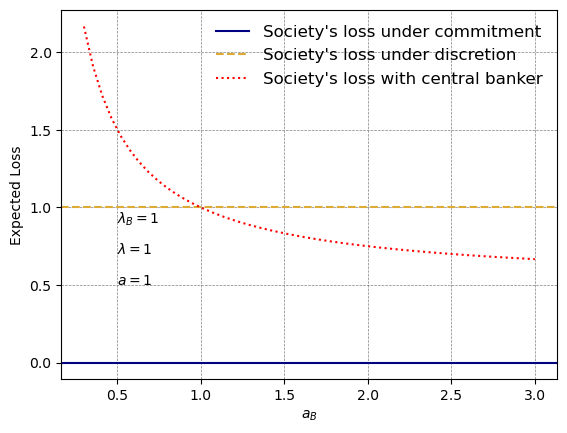

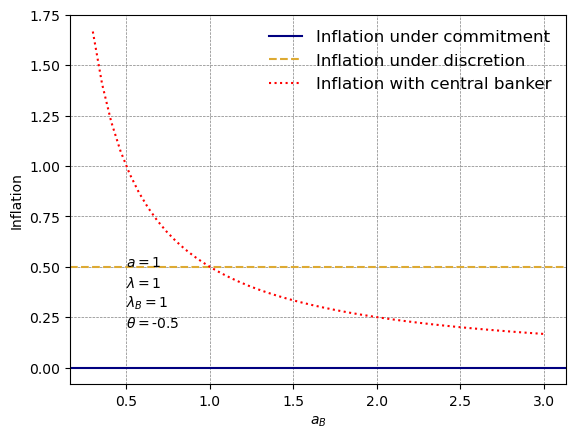

In [51]:
#### Simulate a model with Fischer, Taylor and Calvo contracts

import numpy as np
import matplotlib.pyplot as plt

CB =  ['#000000','#004488','#BB5566','#DDAA33', 'purple']
LS = ['solid', 'dashed', ':', '-.']
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 11 15:29:36 2022

@author: qwp970
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits import mplot3d

#Society's inflation aversion
a = 1

#Society's output deviation aversion
λ = 1

#Desired inflation
pi_bar = 0

#Desired ouput
x_bar = 0

##### MP Rule
phi = pi_bar
phi_theta = 0
phi_e = λ/(a+λ)

sigma_theta = 1
sigma_e = 0

## Expected loss under commitment
LL_c = 0.5 * a * (phi**2 - phi*pi_bar + phi_theta**2 * sigma_theta + \
         phi_e**2 * sigma_e - phi*pi_bar + pi_bar**2) + \
       0.5 * λ * (phi_theta**2 + (1-phi_e)**2 * sigma_e + x_bar**2)

## Expected loss under discretion
LL_d = 0.5 * a*( (λ/a)*(x_bar**2 + sigma_theta) + λ**2/(a+λ)**2 * sigma_e) + \
       0.5 * λ*( (x_bar**2 + sigma_theta) + a**2/(a+l)**2 * sigma_e)
       
## Expected loss with central banker
lnum = 50


def cb_loss(acb, λcb, a,λ,x_bar,sigma_theta, sigma_e):
    #λcb is the central banker's inflation aversion
    #acb is the central banker's output deviation aversion
    #λ is society's inflation aversion
    #a is society's output deviation aversion
    LL_b = 0.5 * a*( (λcb/acb)*(x_bar**2 + sigma_theta) + λcb**2/(acb+λcb)**2 * sigma_e) + \
           0.5 * λ*( (x_bar**2 + sigma_theta) + acb**2/(acb+λcb)**2 * sigma_e)
    return LL_b

#Loss with central banker, holding acb constant, varying λcb
acb = np.linspace(0.3, 3,lnum)
λcb = 1
loss_b = cb_loss(acb, λcb,a,λ,x_bar,sigma_theta, sigma_e)

## Plotting the loss function
plt.axhline(LL_c, label= "Society's loss under commitment", color = 'navy')
plt.axhline(LL_d, label= "Society's loss under discretion", color = CB[3], linestyle = 'dashed')
plt.plot(acb, loss_b, label= "Society's loss with central banker", color = 'red', linestyle = LS[2])
plt.legend(frameon= False, fontsize="12")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$a = $' + str(a),(0.5,0.5))
plt.annotate(r'$\lambda = $' + str(λ),(0.5,0.7))
plt.annotate(r'$\lambda_{B} = $' + str(λcb),(0.5,0.9))
plt.ylabel('Expected Loss')
plt.xlabel(r'$a_B$')
plt.savefig('cb_loss.pdf')
plt.show()

## Plotting the inflation
θ = -0.5 #hypothetical potential output
pi_D = pi_bar + λ/a*(x_bar-θ)
pi_B = pi_bar + λcb/acb*(x_bar-θ)
plt.axhline(pi_bar, label= "Inflation under commitment", color = 'navy')
plt.axhline(pi_D,   label= "Inflation under discretion", color = CB[3], linestyle = 'dashed')
plt.plot(acb, pi_B, label= "Inflation with central banker", color = 'red', linestyle = LS[2])
plt.legend(frameon= False, fontsize="12")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$a = $' + str(a),(0.5,0.5))
plt.annotate(r'$\lambda = $' + str(λ),(0.5,0.4))
plt.annotate(r'$\lambda_{B} = $' + str(λcb),(0.5,0.3))
plt.annotate(r'$\theta = $' + str(θ),(0.5,0.2))
plt.ylabel('Inflation')
plt.xlabel(r'$a_B$')
plt.savefig('cb_infl.pdf')
plt.show()
